In [1]:
import numpy as np
import pandas as pd
from scipy import stats


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/combinedData.csv')
target = pd.read_csv('../data/combinedTarget.csv')

data = data.merge(target, how='left',on=['Provider','Set'])
data.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y'], inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,13,14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Inpatient Deductible

In [4]:
data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Set', 'Status', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stro

In [5]:
data[data.Status=='in']['DeductibleAmtPaid'].value_counts()

1068.0    48930
0.0        1095
Name: DeductibleAmtPaid, dtype: int64

Not much variance


## Outpatient Deductible

In [6]:
outpat = data[data.Status=='out']

In [13]:
y = outpat[['DeductibleAmtPaid','ClaimID']].set_index('ClaimID')
x = outpat.drop(columns = ['TotalClaim','PotentialFraud',
                         'Provider','BeneID','ClaimStartDt','ClaimEndDt',
                         'AttendingPhysician','OperatingPhysician','OtherPhysician',
                         'AdmissionDt','ClmAdmitDiagnosisCode','NumProc','NumDiag','AdmissionDays',
                       'DischargeDt', 'DiagnosisGroupCode','NumChronics','Residuals',
                       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
                       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
                       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
                       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
                       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5','fraudulence',
                       'ClmProcedureCode_6','Set','DOB','DOD','State','County',
                        'DailyCharge','NoOfMonths_PartACov',
       'NoOfMonths_PartBCov']).set_index('ClaimID')



In [26]:
y['DeductibleAmtPaid'].value_counts()

0.0      617412
100.0      5697
70.0       3018
40.0       2557
60.0       2548
80.0       2512
50.0       2489
20.0       1751
30.0       1653
90.0       1519
10.0       1494
200.0       918
897.0         3
876.0         2
865.0         2
854.0         2
886.0         1
Name: DeductibleAmtPaid, dtype: int64

(array([6.17412e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.49400e+03, 1.75100e+03, 0.00000e+00,
        4.21000e+03, 2.48900e+03, 8.07800e+03, 7.21600e+03, 0.00000e+00,
        9.18000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+01]),
 array([0.        , 0.3400085 , 0.68001701, 1.02002551, 1.36003401,
        1.70004252, 2.04005102, 2.38005952, 2.72006803, 3.06007653,
        3.40008503, 3.74009354, 4.08010204, 4.42011054, 4.76011905,
        5.10012755, 5.44013605, 5.78014456, 6.12015306, 6.46016156,
        6.80017007]),
 <a list of 20 Patch objects>)

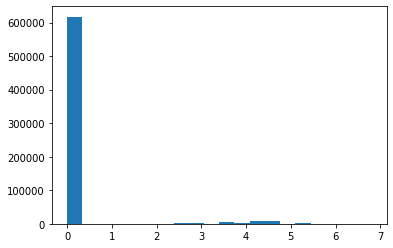

In [38]:
y_trans = np.log(y['DeductibleAmtPaid']+1)
plt.hist(y_trans, bins=20)

## Predicting Deviations from the Average

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts


In [318]:
y = data[['InscClaimAmtReimbursed','ClaimID']].set_index('ClaimID')
x = data.drop(columns = ['TotalClaim','InscClaimAmtReimbursed','PotentialFraud',
                         'Provider','BeneID','ClaimStartDt','ClaimEndDt',
                         'AttendingPhysician','OperatingPhysician','OtherPhysician','DupRecord',
                         'AdmissionDt','ClmAdmitDiagnosisCode','NumProc','NumDiag','AdmissionDays',
                       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode','NumChronics','Residuals',
                       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
                       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
                       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
                       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
                       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5','fraudulence',
                       'ClmProcedureCode_6','Set','DOB','DOD','Gender','Race','State','County',
                        'DailyCharge','NoOfMonths_PartACov',
       'NoOfMonths_PartBCov']).set_index('ClaimID')

y_trans = np.log1p(y)

In [319]:
idx = x.Status == 'in'
x_in, y_in = x.loc[idx,:], y_trans.loc[idx,:]
x_out, y_out = x.loc[~idx,:], y_trans.loc[~idx,:]

x_in.fillna(0,inplace=True)
x_out.fillna(0,inplace=True)

x_in.drop(columns=['Status'],inplace=True)
x_out.drop(columns=['Status'],inplace=True)

x_in[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']] = x_in[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']].apply(lambda x: np.log1p(x+1))

x_out[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']] = x_out[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']].apply(lambda x: np.log1p(x+1))


x_in.fillna(0,inplace=True)
x_out.fillna(0,inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

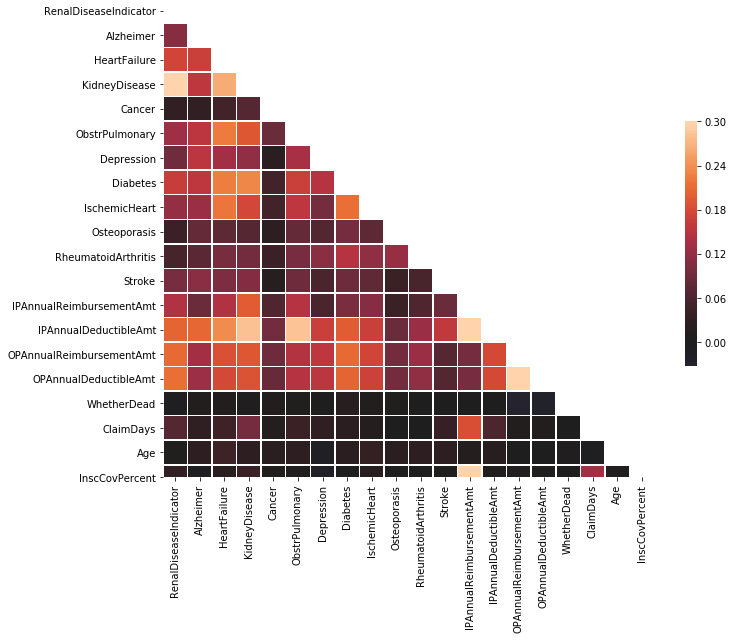

In [320]:
corr = x_in.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f,ax = plt.subplots(figsize=(11,9))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



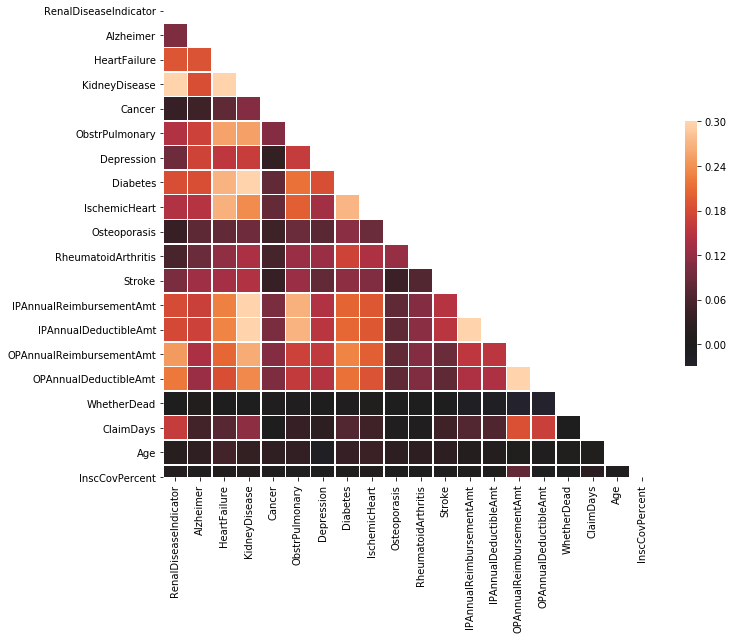

In [321]:
corr = x_out.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f,ax = plt.subplots(figsize=(11,9))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Fit a Linear Model

In [322]:
x_in.columns

Index(['RenalDiseaseIndicator', 'Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'WhetherDead',
       'ClaimDays', 'Age', 'InscCovPercent'],
      dtype='object')

In [323]:
# import statsmodels.api as sm

# #Fit linear model to any dataset
# model_in = sm.OLS(y_in,x_in)
# results_in = model.fit()

# model_out = sm.OLS(y_out,x_out)
# results_out = model.fit()

# #create instance of influence
# influence_in = results_in.get_influence()
# influence_out = results_in.get_influence()

# #leverage (hat values)
# leverage_in = influence_in.hat_matrix_diag
# leverage_out = influence_in.hat_matrix_diag

# #Cook's D values (and p-values) as tuple of arrays
# cooks_d_in = influence_in.cooks_distance
# cooks_d_out = influence_out.cooks_distance

# #standardized residuals
# standardized_residuals_in = influence_in.resid_studentized_internal
# standardized_residuals_in = influence_in.resid_studentized_internal

# #studentized residuals
# studentized_residuals = influence.resid_studentized_external

# steps = [#('o', over),
#          #('u', under),
#          (name, LinearRegression())]
from sklearn.linear_model import LinearRegression

x_in_scaled = preprocessing.scale(x_in)
x_out_scaled = preprocessing.scale(x_out)

#model = Pipeline(steps = steps)
model_in = LinearRegression()
_ = model_in.fit(x_in_scaled,y_in)

model_out = LinearRegression()
_ = model_out.fit(x_out_scaled,y_out)


y_predin = model_in.predict(x_in_scaled)
y_predout = model_out.predict(x_out_scaled)


resin = y_in - y_predin
resout = y_out - y_predout

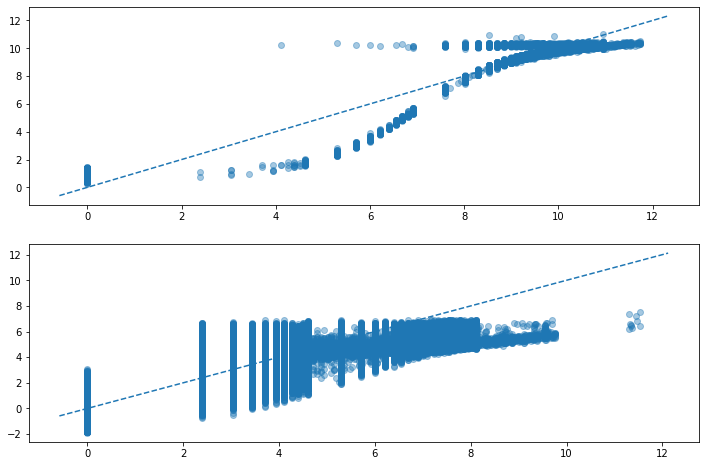

In [324]:
plt.figure(figsize=(12,8))

plt.subplot(211)
ax1 = plt.scatter(y_in, y_predin,alpha=0.4)

abline(1,0)

plt.subplot(212)
ax2 = plt.scatter(y_out, y_predout, alpha=0.4)

abline(1,0)


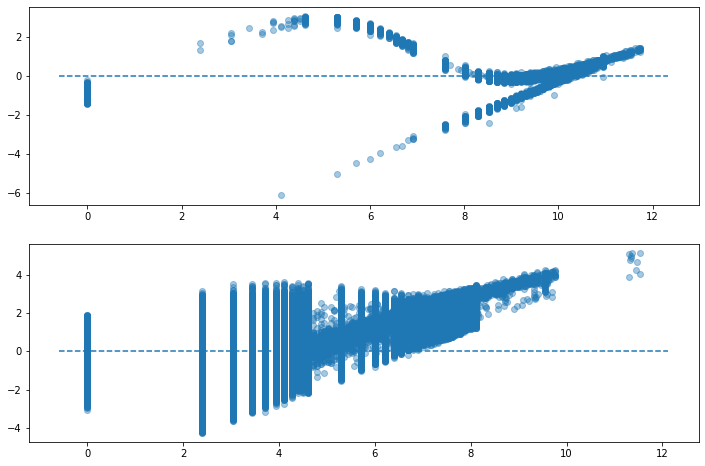

In [325]:
plt.figure(figsize=(12,8))

plt.subplot(211)
ax1 = plt.scatter(y_in, resin,alpha=0.4)

abline(0,0)

plt.subplot(212)
ax2 = plt.scatter(y_out, resout, alpha=0.4)

abline(0,0)


In [ ]:
data_ = data[['Provider','PotentialFraud']]

In [ ]:
def optimal_threshold(residuals, rng = (0.3,3)):
    values = np.arange(rng[0],rng[1],0.1)
    L = len(values)
    unknown_ratio = np.zeros((L,1))
    yes_ratio = np.zeros((L,1))
    
    for i,val in enumerate(values):
        
        residuals['fraudulence'] = (np.abs(residuals['Residuals']) > val) + 0

        #data.drop(columns = 'Residuals',inplace=True)
        dat = data_.merge(residuals, on = 'ClaimID')

        df = dat.groupby(['Provider','PotentialFraud'])['fraudulence'].sum().reset_index()
        counts = df.groupby('PotentialFraud')['Provider'].count()
        df = df.groupby('PotentialFraud')['fraudulence'].mean()
        unknown_ratio[i] = np.log(df[0]*counts[1]/df[1]*counts[0])
        yes_ratio[i] = df[2]*counts[1]/df[1]*counts[2]
    
    diffs = np.concatenate([values.reshape(-1,1),unknown_ratio,yes_ratio],axis=1)
    
    return pd.DataFrame(data=diffs,columns = ['Threshold','?/no','yes/no'])
        
        
    

In [ ]:
df = optimal_threshold(residuals, rng = (0.1,3.2))

In [ ]:
a = preprocessing.scale(df)

In [ ]:
df

In [ ]:
plt.plot(df['Threshold'], a[:,1], 'r--',label = "?toNo")
# line 2 points
x2 = [10,20,30]
y2 = [40,10,30]
# plotting the line 2 points 
plt.plot(df['Threshold'], a[:,2], 'b-', label = "YestoNo")

plt.title('Metric Evaluation: Ratios of Means to NoFraud case')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
residuals['fraudulence'] = (np.abs(residuals['Residuals']) > 1.6) + 0

#data.drop(columns = 'Residuals',inplace=True)
dat = data_.merge(residuals, on = 'ClaimID')

df = dat.groupby(['Provider','PotentialFraud'])['fraudulence'].sum().reset_index()

sns.boxplot(x = 'PotentialFraud', y = 'fraudulence', data=df)
plt.yscale('log')

In [ ]:
residuals.drop(columns=['fradulence'], inplace=True)

In [ ]:
residuals


In [ ]:
residuals.to_csv('./data/residuals.csv')

In [ ]:
sns.lineplot(x = 'Threshold', y = '?/no', data=df)

plt.plot(x1, y1, label = "line 1")
# line 2 points
x2 = [10,20,30]
y2 = [40,10,30]
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")

In [ ]:
np.concatenate([a,b,np.arange(0,5,5)],axis=1)

In [ ]:
dat = data_.merge(residuals, on = 'ClaimID')

df = dat.groupby(['Provider','PotentialFraud'])['fraudulence'].sum().reset_index().groupby('PotentialFraud')['fraudulence'].mean()
df.

In [ ]:
mean_diff = df.groupby('PotentialFraud')['fraudulence'].mean()

In [ ]:
plt.figure(figsize=(18,5))


plt.subplot(131)

sns.distplot(a= data['IPAnnualReimbursementAmt'], kde=False)
plt.yscale('log')

plt.subplot(132)

sns.boxplot(x = 'KidneyDisease',y = 'IPAnnualReimbursementAmt', data = data)
plt.yscale('log')
plt.subplot(133)

sns.boxplot(x = 'KidneyDisease',y = 'IPAnnualDeductibleAmt', data = data)
plt.yscale('log')


In [ ]:
x_out.columns

In [ ]:
data.groupby('Status')['KidneyDisease'].sum()

In [ ]:
y_inT = np.concatenate([y_in,np.repeat('in',y_in.shape[0])[:,np.newaxis]],axis=1)
y_outT = np.concatenate([y_out,np.repeat('in',y_out.shape[0])[:,np.newaxis]],axis=1)

In [ ]:
y_in.shape[0]

In [ ]:
y_true = np.concatenate([y_inT,y_outT])
y_pred = np.concatenate([y_predin,y_predout])

In [ ]:
dat_ = np.concatenate([y_true,y_pred], axis=1)

In [ ]:
linOutput = pd.DataFrame(data=dat_, index=y.index.values, columns = ['Target','Status','Prediction'])

In [ ]:
y_out.isna().sum()

In [ ]:
df = linOutput.astype({'Target': 'float32',
                  'Prediction':'float32'})

In [ ]:
y_in.fill

In [ ]:
df['Residual'] = df['Target'] - df['Prediction']

In [ ]:
df

In [ ]:
from sklearn.cluster import KMeans
kmeansI = KMeans()
kmeansO = KMeans()

In [ ]:
df.query('Status==\'in\'')['Target']
df.query('Status==\'in\'')['Target']

In [ ]:
x_in = df[df.Status=='in'][['Target','Prediction']].values
x_out = df[df.Status=='out'][['Target','Prediction']].values

In [ ]:
np.concatenate([y_in,y_predin],axis=1)

In [ ]:
inn = np.concatenate([y_in,y_predin],axis=1)
kmeansI.set_params(n_clusters=5)
kmeansI.fit(inn)



plt.scatter(inn[:, 0], inn[:, 1], c=kmeansI.labels_, alpha=0.8)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', s=1000, c=[0, 1,2,3])
plt.show()

In [ ]:
x_out

In [ ]:
outt = np.concatenate([y_out,y_predout],axis=1)
kmeansO.set_params(n_clusters=3)
kmeansO.fit(outt)



plt.scatter(outt[:, 0], outt[:, 1], c=kmeansO.labels_, alpha=0.8)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', s=1000, c=[0, 1,2,3])
plt.show()

In [276]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(211)
ax1 = plt.scatter(y_in, y_predin, alpha=0.4)

abline(1,0)

plt.subplot(212)
ax2 = plt.scatter(y_out, y_predout, alpha=0.4)

abline(1,0)

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

## MLP Classifier

In [328]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

print(__doc__)


X_train, X_test, y_train, y_test = tts(X, y,random_state=0)

anova_filter = SelectKBest(f_regression, k=5)

param_grid = dict(MLP__learning_rate_init = np.logspace(-3,-1,3),
                  MLP__max_iter = [500],
                  anova__k = range(4,10,2))

name = 'MLP'
steps = [('scaler', StandardScaler()),
         #('o', over),
         #('u', under),
         ('anova', anova_filter),
         (name, MLPClassifier(random_state=1,
                              #alpha=0.1,
                              learning_rate='adaptive'))]

model = Pipeline(steps = steps)


search = GridSearchCV(model, param_grid=param_grid).fit(X_train,y_train)


#search .fit(X_train,y_train)


#coef = model[:-1].inverse_transform(model[name].coef_)
#print(coef)
#logitMetrics(X_test,y_test,model);
#cost_model(x_train,y_train,model);
#confusion(X_test,y_test,model)
#ROC(X_test,y_test,model)
#cost_model(x_test,y_test,model);
#feature_importance(model,name,'Normalized Variables')


Automatically created module for IPython interactive environment


ValueError: Found input variables with inconsistent numbers of samples: [5410, 693603]

In [326]:
model_ = search.best_estimator_

In [327]:
#model = search.best_estimator_

logitMetrics(X_test,y_test,model_);
#cost_model(X_train,y_train,model);
confusion(X_test,y_test,model_)
ROC(X_test,y_test,model_)

ValueError: X has 23 features, but this StandardScaler is expecting 24 features as input.

In [250]:
dir(search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_

## Nested CV

In [ ]:

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over

param_grid = {
    MLP__learning_rate_init = np.logspace(-4,-1,10),
    MLP__max_iter = [500,1000,2000]
}

non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)


Automatically created module for IPython interactive environment

learning on dataset iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.503452
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504185
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set s

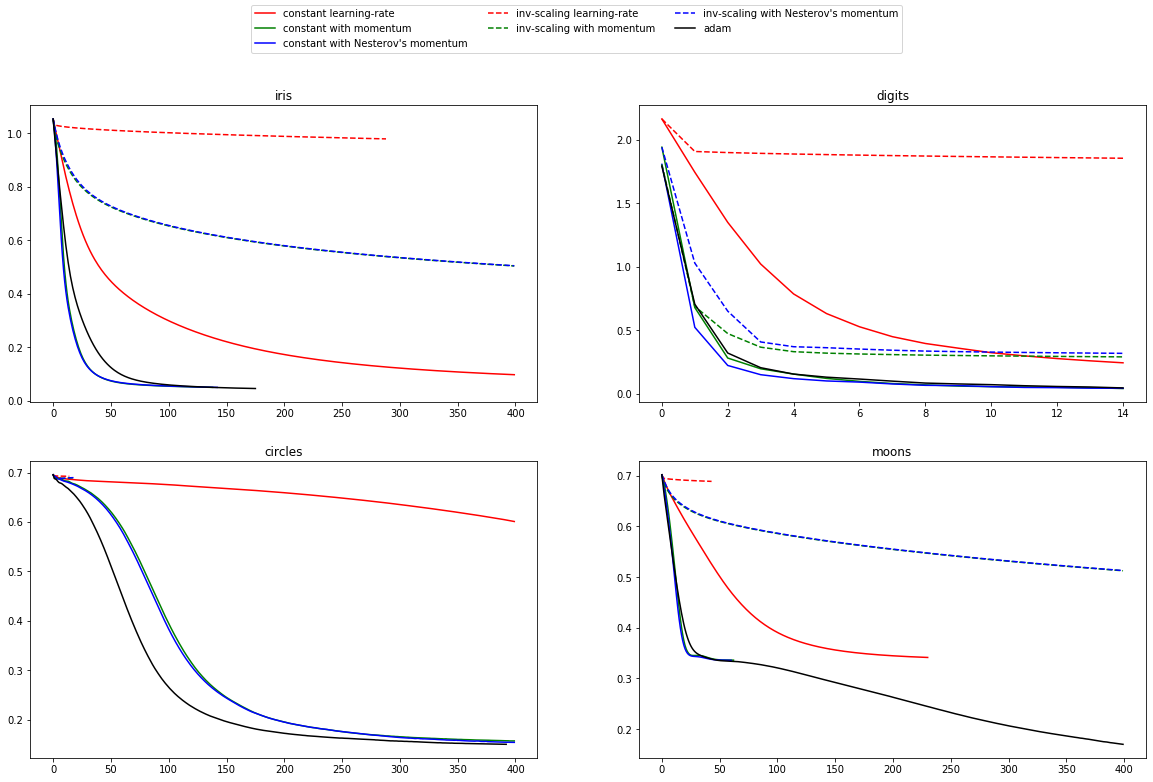

In [234]:
print(__doc__)

import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(20, 12))
# load / generate some toy datasets
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data_sets = [(iris.data, iris.target),
             (X_digits, y_digits),
             datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()